<a href="https://colab.research.google.com/github/951237/TIL/blob/master/TIL_200523_%EC%95%84%EB%B3%B4%EC%B9%B4%EB%8F%84_%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아보카도 가격예측 프로그램 

## 데이터 정제하기

In [0]:
import numpy as np
import pandas as pd

In [0]:
FILE_URL = '/content/drive/My Drive/data/dataset/avocado.csv'

In [16]:
df = pd.read_csv(FILE_URL)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [11]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [17]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [20]:
df = df.loc[ (df.type == 'conventional') & (df.region == 'TotalUS') ]
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 2652 to 9101
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    169 non-null    int64         
 1   Date          169 non-null    datetime64[ns]
 2   AveragePrice  169 non-null    float64       
 3   Total Volume  169 non-null    float64       
 4   4046          169 non-null    float64       
 5   4225          169 non-null    float64       
 6   4770          169 non-null    float64       
 7   Total Bags    169 non-null    float64       
 8   Small Bags    169 non-null    float64       
 9   Large Bags    169 non-null    float64       
 10  XLarge Bags   169 non-null    float64       
 11  type          169 non-null    object        
 12  year          169 non-null    int64         
 13  region        169 non-null    object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 19.8+ KB


In [0]:
data = df[ ['Date', 'AveragePrice'] ].reset_index(drop = True)

In [33]:
data.head()

,Date,AveragePrice
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [37]:
print(data.head(), '\n')
print(data.info())

        Date  AveragePrice
0 2015-12-27          0.95
1 2015-12-20          0.98
2 2015-12-13          0.93
3 2015-12-06          0.89
4 2015-11-29          0.99 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB
None


In [0]:
def df_info(df):
    print(df.head(), '\n')
    print(df.tail(), '\n')
    print(df.info())


In [45]:
df_info(data)

        Date  AveragePrice
0 2015-12-27          0.95
1 2015-12-20          0.98
2 2015-12-13          0.93
3 2015-12-06          0.89
4 2015-11-29          0.99 

          Date  AveragePrice
164 2018-02-04          0.87
165 2018-01-28          1.09
166 2018-01-21          1.08
167 2018-01-14          1.20
168 2018-01-07          1.13 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB
None


In [48]:
data = data.rename( columns={ 'Date' : 'ds', 'y' : 'y' } )
df_info(data)

          ds     y
0 2015-12-27  0.95
1 2015-12-20  0.98
2 2015-12-13  0.93
3 2015-12-06  0.89
4 2015-11-29  0.99 

            ds     y
164 2018-02-04  0.87
165 2018-01-28  1.09
166 2018-01-21  1.08
167 2018-01-14  1.20
168 2018-01-07  1.13 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB
None


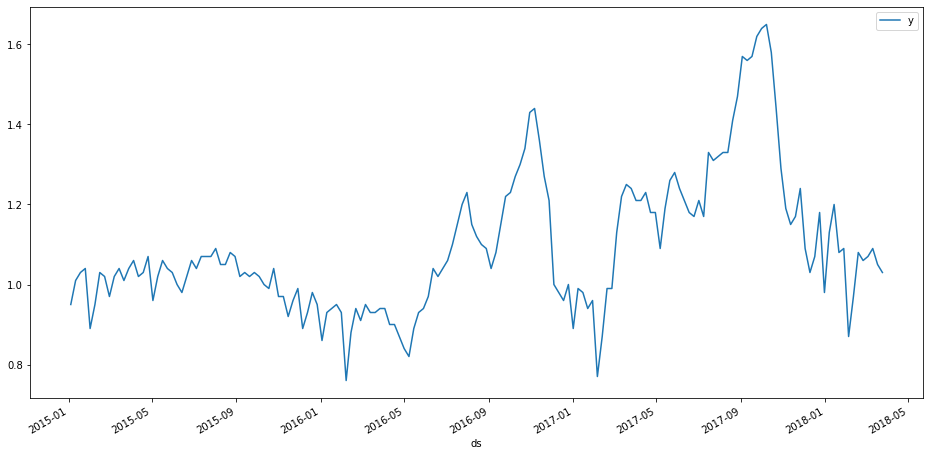

In [49]:
data.plot(x='ds', y='y', figsize=(16,8))

## 가격예측하기 

In [63]:
!pip install fbprophet

In [0]:
from fbprophet import Prophet

In [66]:
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=365)

In [0]:
forecast = model.predict(future)

In [69]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.175446,0.983633,1.249164,1.105282,1.238800,-0.059409,-0.059409,-0.059409,-0.059409,-0.059409,-0.059409,0.0,0.0,0.0,1.116037
530,2019-03-22,1.175342,0.988566,1.247532,1.104921,1.238928,-0.057987,-0.057987,-0.057987,-0.057987,-0.057987,-0.057987,0.0,0.0,0.0,1.117355
531,2019-03-23,1.175237,0.985579,1.256558,1.104560,1.239002,-0.056090,-0.056090,-0.056090,-0.056090,-0.056090,-0.056090,0.0,0.0,0.0,1.119147
532,2019-03-24,1.175133,1.000809,1.249179,1.104199,1.239067,-0.053734,-0.053734,-0.053734,-0.053734,-0.053734,-0.053734,0.0,0.0,0.0,1.121399
533,2019-03-25,1.175029,0.988897,1.257886,1.103859,1.239098,-0.050950,-0.050950,-0.050950,-0.050950,-0.050950,-0.050950,0.0,0.0,0.0,1.124078


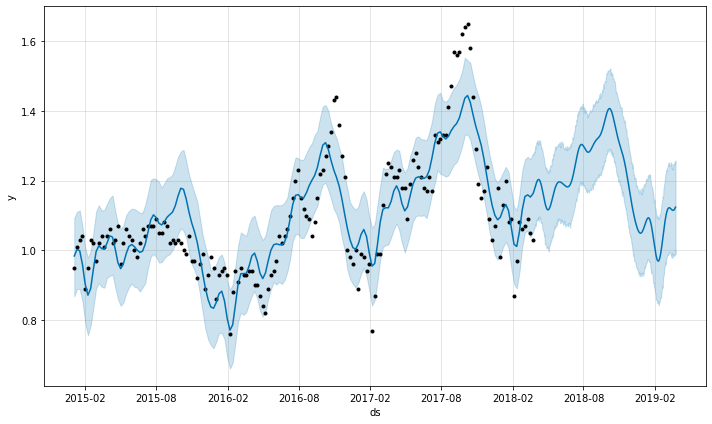

In [70]:
fig1 = model.plot(forecast)

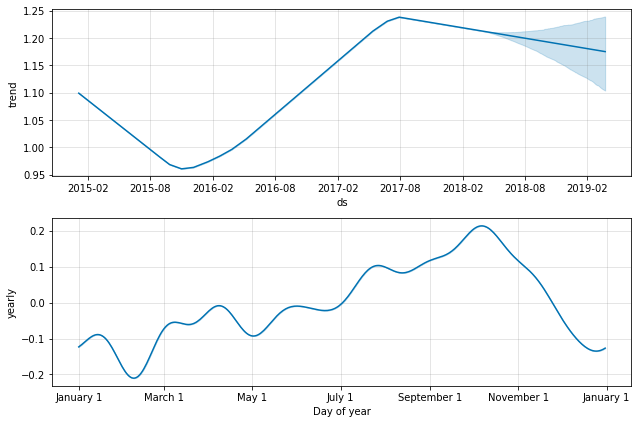

In [71]:
fig2 = model.plot_components(forecast)